# Draw Beams for paper

AuxTel

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS

- creation date : May 18th 2020


In [230]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import pandas as pd
import itertools
import matplotlib.gridspec as gridspec
from matplotlib.patches import Circle,Ellipse

In [231]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (13, 13),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'font.size': 14}
plt.rcParams.update(params)

## Constants for conversions

In [232]:
m_to_mm=1000.
mm_to_m=1e-3
inch_to_mm=25.4
mm_to_inch=1./inch_to_mm
micr_to_m=1e-6
micr_to_mm=1e-3
m_to_micr=1./micr_to_m
m_to_cm=100.
m_to_nm=1e9
nm_to_m=1./m_to_nm

In [233]:
arcdeg_to_arcmin=60.
arcmin_to_arcdeg=1./arcdeg_to_arcmin
arcmin_to_arcsec=60.
arcdeg_to_arcsec=arcdeg_to_arcmin*arcmin_to_arcsec
arcsec_to_arcdeg=1./arcdeg_to_arcsec

In [234]:
deg_to_rad=np.pi/180.

In [235]:
rad_to_deg=1./deg_to_rad
rad_to_arcsec=rad_to_deg*arcdeg_to_arcsec
rad_to_arcmin=rad_to_deg*arcdeg_to_arcmin
arcmin_to_rad=1./rad_to_arcmin

## Configuration parameters at the telescope

#### telescope

In [236]:
Tel_Focal_Length=21.6 # m : Focal length of the telescope
Tel_Diameter=1.2 # m : Diameter of the telescope    
Tel_Fnum=Tel_Focal_Length/Tel_Diameter

#### filter

In [237]:
Filt_D=0.265 # m distance of the filter position wrt CCD plane
Filt_size=3*inch_to_mm

#### CCD detector

In [238]:
Det_xpic=10.0 # microns per pixel
#Det_NbPix=2048 # number of pixels per CCD side
Det_NbPix=4096 # number of pixels per CCD side For 400 only
Det_size=Det_xpic*Det_NbPix*micr_to_mm # CCD size in mm, 5 cm or 2 inch

## Input file

In [239]:
# number of rays
NBEAM_X=11
NBEAM_Y=11
NBEAM=NBEAM_X*NBEAM_Y
NWL=4
NBTOT=NBEAM*NWL

In [240]:
theta_x=0.  # angle in arcmin
theta_y=0.  # angle in arcmin 

In [241]:
theta_x_num=int(theta_x*10)
theta_y_num=int(theta_y*10)

In [242]:
if theta_x_num>0:
    theta_nstr='{:0>2}'.format(theta_x_num)
    theta_x_str="p"+theta_nstr
else:
    theta_nstr='{:0>2}'.format(-theta_x_num)
    theta_x_str="m"+theta_nstr

In [243]:
if theta_y_num>0:
    theta_nstr='{:0>2}'.format(theta_y_num)
    theta_y_str="p"+theta_nstr
else:
    theta_nstr='{:0>2}'.format(-theta_y_num)
    theta_y_str="m"+theta_nstr

In [244]:
Beam4_Rayfile="Beam4_Rayfile_{:d}_allwl_{}_{}".format(NBTOT,theta_x_str,theta_y_str)

In [245]:
Beam4_Rayfile

'Beam4_Rayfile_484_allwl_m00_m00'

# Read input files

## Hologram

In [246]:
rayfile_hoe="HOE_"+Beam4_Rayfile+"_RAY_OUT.xlsx"
rayfile_R150="R150_"+Beam4_Rayfile+"_RAY_OUT.xlsx"

In [247]:
input_hoe = pd.ExcelFile(rayfile_hoe)
df_hoe = input_hoe.parse(index_row=0,header=1)
#df_hoe=df_hoe.iloc[0:NBTOT]

In [248]:
df_hoe

,X0,Y0,Z0,U0,V0,W0,wave,col,X1,Y1,...,X3,Y3,Z3,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23
0,#----------,----------,----------,----------,----------,----------,----------,---------------,----------,----------,...,----------,----------,----------,----------,----------,----------,----------,----------,NaN,NaN
1,-7.36016,-7.36016,0,0.0277528,0.0277528,0.999229,0.0004,b,-5.55484,-5.55484,...,12.4006,-0.00625,265,0,0,12.4006,-0.00625,265,OK,3.0
2,-5.88813,-7.36016,0,0.0222053,0.0277567,0.999368,0.0004,b,-4.44387,-5.55484,...,12.4043,-0.00626,265,0,0,12.4043,-0.00626,265,OK,3.0
3,-4.4161,-7.36016,0,0.0166558,0.0277596,0.999476,0.0004,b,-3.3329,-5.55484,...,12.408,-0.00631,265,0,0,12.408,-0.00631,265,OK,3.0
4,-2.94407,-7.36016,0,0.0111047,0.0277618,0.999553,0.0004,b,-2.22194,-5.55484,...,12.4118,-0.00632,265,0,0,12.4118,-0.00632,265,OK,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,1.47203,7.36016,0,-0.0055526,-0.0277631,0.999599,0.001,k,1.11097,5.55484,...,31.3556,-0.02496,265,0,0,31.3556,-0.02496,265,OK,3.0
481,2.94407,7.36016,0,-0.0111047,-0.0277618,0.999553,0.001,k,2.22194,5.55484,...,31.3406,-0.02489,265,0,0,31.3406,-0.02489,265,OK,3.0
482,4.4161,7.36016,0,-0.0166558,-0.0277596,0.999476,0.001,k,3.3329,5.55484,...,31.3257,-0.0248,265,0,0,31.3257,-0.0248,265,OK,3.0
483,5.88813,7.36016,0,-0.0222053,-0.0277567,0.999368,0.001,k,4.44387,5.55484,...,31.3108,-0.02476,265,0,0,31.3108,-0.02476,265,OK,3.0


In [249]:
df_hoe=df_hoe.drop(0)

In [250]:
# rename columns otherwise they are not recognize and swap X,Y
#df_hoe.columns = ["X0","Y0","Z0","U0","V0","W0","wave","col","X1","Y1","Z1","X2","Y2","Z2","X3","Y3","Z3","Xgoal","Ygoal","Xfinal","Yfinal","Zfinal","Notes"]

In [251]:
df_hoe = df_hoe.reset_index()
#df_hoe.drop(['index'], axis=1, inplace=True)

In [252]:
df_hoe

,index,X0,Y0,Z0,U0,V0,W0,wave,col,X1,...,X3,Y3,Z3,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23
0,1,-7.36016,-7.36016,0,0.0277528,0.0277528,0.999229,0.0004,b,-5.55484,...,12.4006,-0.00625,265,0,0,12.4006,-0.00625,265,OK,3.0
1,2,-5.88813,-7.36016,0,0.0222053,0.0277567,0.999368,0.0004,b,-4.44387,...,12.4043,-0.00626,265,0,0,12.4043,-0.00626,265,OK,3.0
2,3,-4.4161,-7.36016,0,0.0166558,0.0277596,0.999476,0.0004,b,-3.3329,...,12.408,-0.00631,265,0,0,12.408,-0.00631,265,OK,3.0
3,4,-2.94407,-7.36016,0,0.0111047,0.0277618,0.999553,0.0004,b,-2.22194,...,12.4118,-0.00632,265,0,0,12.4118,-0.00632,265,OK,3.0
4,5,-1.47203,-7.36016,0,0.0055526,0.0277631,0.999599,0.0004,b,-1.11097,...,12.4155,-0.00634,265,0,0,12.4155,-0.00634,265,OK,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,480,1.47203,7.36016,0,-0.0055526,-0.0277631,0.999599,0.001,k,1.11097,...,31.3556,-0.02496,265,0,0,31.3556,-0.02496,265,OK,3.0
480,481,2.94407,7.36016,0,-0.0111047,-0.0277618,0.999553,0.001,k,2.22194,...,31.3406,-0.02489,265,0,0,31.3406,-0.02489,265,OK,3.0
481,482,4.4161,7.36016,0,-0.0166558,-0.0277596,0.999476,0.001,k,3.3329,...,31.3257,-0.0248,265,0,0,31.3257,-0.0248,265,OK,3.0
482,483,5.88813,7.36016,0,-0.0222053,-0.0277567,0.999368,0.001,k,4.44387,...,31.3108,-0.02476,265,0,0,31.3108,-0.02476,265,OK,3.0


In [253]:
df_hoe.columns

Index(['index', ' X0', 'Y0', 'Z0', 'U0', 'V0', 'W0', 'wave', 'col', 'X1', 'Y1',
       'Z1', 'X2', 'Y2', 'Z2', 'X3', 'Y3', 'Z3', 'Xgoal', 'Ygoal', 'Xfinal',
       'Yfinal', 'Zfinal', 'Notes', 'Unnamed: 23'],
      dtype='object')

In [254]:
df_hoe.columns = ["index","X0","Y0","Z0","U0","V0","W0","wave","col","X1","Y1","Z1","X2","Y2","Z2","X3","Y3","Z3","Xgoal","Ygoal","Xfinal","Yfinal","Zfinal","Notes","Unnamed"]

## Ronchi 150

In [255]:
input_R150 = pd.ExcelFile(rayfile_R150)
df_R150 = input_R150.parse(index_row=0,header=1)
#df_R150=df_R150.iloc[0:NBTOT]

In [256]:
# rename columns otherwise they are not recognize
#df_R150.columns = ["X0","Y0","Z0","U0","V0","W0","wave","X1","Y1","Z1","X2","Y2","Z2","X3","Y3","Z3","Xfinal","Yfinal","Zfinal","Notes"]

In [257]:
df_R150=df_R150.drop(0)
df_R150 = df_R150.reset_index()

In [258]:
df_R150

,index,X0,Y0,Z0,U0,V0,W0,wave,col,X1,...,X3,Y3,Z3,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23
0,1,-7.36016,-7.36016,0,0.0277528,0.0277528,0.999229,0.0004,b,-5.55484,...,12.0102,0.01928,265,0,0,12.0102,0.01928,265,OK,3.0
1,2,-5.88813,-7.36016,0,0.0222053,0.0277567,0.999368,0.0004,b,-4.44387,...,11.9991,0.01743,265,0,0,11.9991,0.01743,265,OK,3.0
2,3,-4.4161,-7.36016,0,0.0166558,0.0277596,0.999476,0.0004,b,-3.3329,...,11.9892,0.01554,265,0,0,11.9892,0.01554,265,OK,3.0
3,4,-2.94407,-7.36016,0,0.0111047,0.0277618,0.999553,0.0004,b,-2.22194,...,11.9804,0.0137,265,0,0,11.9804,0.0137,265,OK,3.0
4,5,-1.47203,-7.36016,0,0.0055526,0.0277631,0.999599,0.0004,b,-1.11097,...,11.9727,0.01185,265,0,0,11.9727,0.01185,265,OK,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,480,1.47203,7.36016,0,-0.0055526,-0.0277631,0.999599,0.001,k,1.11097,...,30.1666,-0.05855,265,0,0,30.1666,-0.05855,265,OK,3.0
480,481,2.94407,7.36016,0,-0.0111047,-0.0277618,0.999553,0.001,k,2.22194,...,30.1325,-0.0538,265,0,0,30.1325,-0.0538,265,OK,3.0
481,482,4.4161,7.36016,0,-0.0166558,-0.0277596,0.999476,0.001,k,3.3329,...,30.1014,-0.04905,265,0,0,30.1014,-0.04905,265,OK,3.0
482,483,5.88813,7.36016,0,-0.0222053,-0.0277567,0.999368,0.001,k,4.44387,...,30.0731,-0.04437,265,0,0,30.0731,-0.04437,265,OK,3.0


# Draw beam

In [259]:
ColorDict = {0.0004:"b",0.0006:"g",0.0008:"r",0.001:"k"}  # map wl --> color character
WLIndexDict = {0:0.0004,1:0.0006,2:0.0008,3:0.001}        # map index --> wl in mm

In [260]:
def GetRayConvergence(x0,y0,u0,v0,y1,u1,v1,y2,u2,v2,wl,a,m=1,XMIN=0,XMAX=100,YMIN=0,YMAX=100):
    """
    Compute convergence of upper, lower and central ray in 2D plane (X,Y)
    input:
      (x0,y0) : coordinate of central ray usually (0,0)
      (u0,v0) : vector director coordinate of central ray (usually  (1,0) )
      (u1,v1) : vector director coordinate of upper ray (usually  u1>0 v1<0)
      (u2,v2) : vector director coordinate of lower ray (usually  u2>0 v2<0)
      (x0,y1) : upper ray coordinate at disperser   y1>0
      (x0,y2) : lower ray coordinate at disperser  usually y2=-y1 <0
      a : grating spacing in mm
      wl : wavelength in mm
      m : order
      all units are in mm
    
    """
    #assert u0**2+v0**2==1
    #assert u1**2+v1**2==1
    #assert u2**2+v2**2==1
    
    # angles with respect to horizontal line
    theta0=np.arcsin(v0+m*wl/a)
    theta1=np.arcsin(v1+m*wl/a)
    theta2=np.arcsin(v2+m*wl/a)
    
    XX=np.linspace(XMIN,XMAX,50)
    
    YY0=y0+np.tan(theta0)*(XX-x0)
    YY1=y1+np.tan(theta1)*(XX-x0)
    YY2=y2+np.tan(theta2)*(XX-x0)
    
    return XX,YY0,YY1,YY2
    

In [261]:
def GetRayConvergenceIntersectionSimple(x0,y0,u0,v0,y1,u1,v1,y2,u2,v2,wl,a,m=1):
    """
    Compute convergence intersection of upper, lower and central ray in 2D plane (X,Y)
    input:
      (x0,y0) : coordinate of central ray usually (0,0)
      (u0,v0) : vector director coordinate of central ray (usually  (1,0) )
      (u1,v1) : vector director coordinate of upper ray (usually  u1>0 v1<0)
      (u2,v2) : vector director coordinate of lower ray (usually  u2>0 v2<0)
      (x0,y1) : upper ray coordinate at disperser   y1>0
      (x0,y2) : lower ray coordinate at disperser  usually y2=-y1 <0
      a : grating spacing in mm
      wl : wavelength in mm
      m : order
      all units are in mm
    
    """
    #assert u0**2+v0**2==1
    #assert u1**2+v1**2==1
    #assert u2**2+v2**2==1
    
    # angles with respect to horizontal line
    theta0=np.arcsin(v0+m*wl/a)
    theta1=np.arcsin(v1+m*wl/a)
    theta2=np.arcsin(v2+m*wl/a)
    

    dx=(y1-y2)/(np.tan(theta2)-np.tan(theta1))
    x=x0+dx
    y=y0+np.tan(theta0)*dx
    
    
    return x,y
    

In [262]:
def GetRayConvergenceIntersectionPoints(x0,y0,u0,v0,y1,u1,v1,y2,u2,v2,a,m=1,WLMIN=0.,WLMAX=1200.,NBPOINTS=1200):
    """
    Give the convergence points
    
    """
    
    
    all_wl=np.linspace(WLMIN,WLMAX,NBPOINTS)*1e-6
    
    X,Y=GetRayConvergenceIntersectionSimple(x0,y0,u0,v0,y1,u1,v1,y2,u2,v2,all_wl,a,m)
       
    return X,Y

## Ronchi 150

### central ray

In [263]:
central_ray=df_R150.loc[(df_R150["U0"]==0) & (df_R150["X0"]==0) & (df_R150["Y0"]==0)]

In [264]:
central_ray

,index,X0,Y0,Z0,U0,V0,W0,wave,col,X1,...,X3,Y3,Z3,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23
60,61,0,0,0,0,0,1,0.0004,b,0,...,11.9616,0,265,0,0,11.9616,0,265,OK,3.0
181,182,0,0,0,0,0,1,0.0006,g,0,...,17.983,0,265,0,0,17.983,0,265,OK,3.0
302,303,0,0,0,0,0,1,0.0008,r,0,...,24.0538,0,265,0,0,24.0538,0,265,OK,3.0
423,424,0,0,0,0,0,1,0.001,k,0,...,30.1916,0,265,0,0,30.1916,0,265,OK,3.0


In [265]:
R0C_R150=central_ray.mean()["Z3"]-central_ray.mean()["Z2"]
X0C_R150=central_ray.mean()["Z1"]-central_ray.mean()["Z3"]
Y0C_R150=0

### The upper ray

In [266]:
df_R150.loc[(df_R150["X0"]==df_R150["X0"].max()) & (df_R150["Y0"]==0)]

,index,X0,Y0,Z0,U0,V0,W0,wave,col,X1,...,X3,Y3,Z3,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23
65,66,7.36016,0,0,-0.0277635,0,0.999614,0.0004,b,5.55484,...,11.9455,0,265,0,0,11.9455,0,265,OK,3.0
186,187,7.36016,0,0,-0.0277635,0,0.999614,0.0006,g,5.55484,...,17.9362,0,265,0,0,17.9362,0,265,OK,3.0
307,308,7.36016,0,0,-0.0277635,0,0.999614,0.0008,r,5.55484,...,23.9607,0,265,0,0,23.9607,0,265,OK,3.0
428,429,7.36016,0,0,-0.0277635,0,0.999614,0.001,k,5.55484,...,30.0359,0,265,0,0,30.0359,0,265,OK,3.0


### The lowest ray

In [267]:
df_R150.loc[(df_R150["X0"]==df_R150["X0"].min()) & (df_R150["Y0"]==0)]

,index,X0,Y0,Z0,U0,V0,W0,wave,col,X1,...,X3,Y3,Z3,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23
55,56,-7.36016,0,0,0.0277635,0,0.999614,0.0004,b,-5.55484,...,12.0055,0,265,0,0,12.0055,0,265,OK,3.0
176,177,-7.36016,0,0,0.0277635,0,0.999614,0.0006,g,-5.55484,...,18.0721,0,265,0,0,18.0721,0,265,OK,3.0
297,298,-7.36016,0,0,0.0277635,0,0.999614,0.0008,r,-5.55484,...,24.2042,0,265,0,0,24.2042,0,265,OK,3.0
418,419,-7.36016,0,0,0.0277635,0,0.999614,0.001,k,-5.55484,...,30.4204,0,265,0,0,30.4204,0,265,OK,3.0


Text(0, 0.5, 'X (mm)')

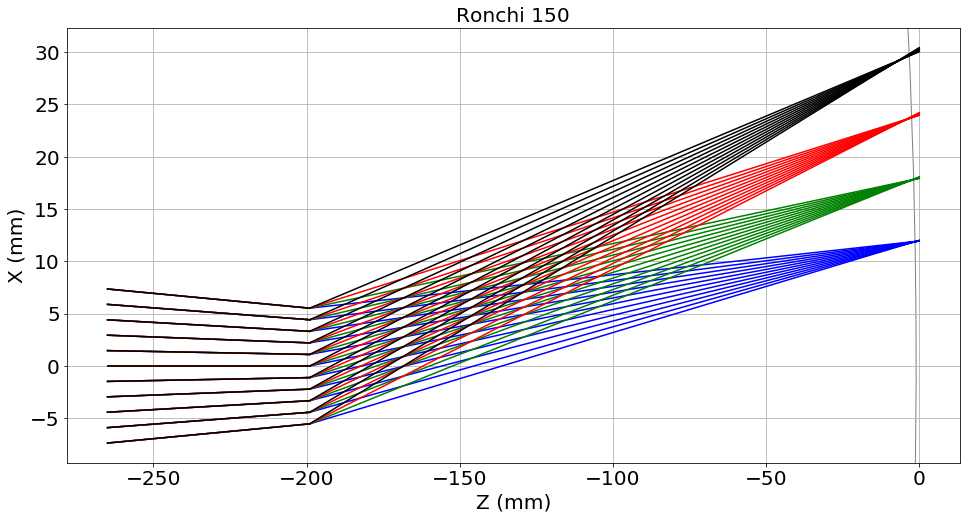

In [268]:
#fig=plt.figure(figsize=(16,8))
fig,ax = plt.subplots(figsize=(16,8))

for index, row in df_R150.iterrows():
    wl=row["wave"]
    col=ColorDict[wl]
    X0=row["X0"];Y0=row["Y0"];Z0=row["Z0"]-row["Z3"]
    X1=row["X1"];Y1=row["Y1"];Z1=row["Z1"]-row["Z3"]
    X2=row["X2"];Y2=row["Y2"];Z2=row["Z2"]-row["Z3"]
    X3=row["X3"];Y3=row["Y3"];Z3=row["Z3"]-row["Z3"]
    if Y0==0:
        ax.plot([Z0,Z1],[X0,X1],"-",color=col)
        ax.plot([Z1,Z2],[X1,X2],"-",color=col)
        ax.plot([Z2,Z3],[X2,X3],"-",color=col)
        
ellipse = mpl.patches.Ellipse(xy=(X0C_R400, Y0C_R400), width=2*R0C_R400, height=2*R0C_R400,angle=1,color="grey",fill=False)        

fig.gca().add_artist(ellipse)


ax.grid()
#ax.set_xlim(-70,0)
#ax.set_ylim(-10,30)
ax.set_title("Ronchi 150")   
ax.set_xlabel("Z (mm)")
ax.set_ylabel("X (mm)")    

### Grating equation

In [269]:
a=1./150.

In [270]:
idx_wl=3
thewl=WLIndexDict[idx_wl] 

In [271]:
central_ray=(df_R150.loc[(df_R150["U0"]==0) & (df_R150["X0"]==0) & (df_R150["Y0"]==0)]).iloc[3]
central_ray

index              424
X0                   0
Y0                   0
Z0                   0
U0                   0
V0                   0
W0                   1
wave             0.001
col                  k
X1                   0
Y1                   0
Z1                  65
X2                   0
Y2                   0
Z2                  66
X3             30.1916
Y3                   0
Z3                 265
Xgoal                0
Ygoal                0
Xfinal         30.1916
Yfinal               0
Zfinal             265
Notes               OK
Unnamed: 23          3
Name: 423, dtype: object

In [272]:
upper_ray=(df_R150.loc[(df_R150["X0"]==df_R150["X0"].max()) & (df_R150["Y0"]==0)]).iloc[3]
upper_ray

index                429
X0               7.36016
Y0                     0
Z0                     0
U0            -0.0277635
V0                     0
W0              0.999614
wave               0.001
col                    k
X1               5.55484
Y1                     0
Z1                    65
X2               5.52707
Y2                     0
Z2                    66
X3               30.0359
Y3                     0
Z3                   265
Xgoal                  0
Ygoal                  0
Xfinal           30.0359
Yfinal                 0
Zfinal               265
Notes                 OK
Unnamed: 23            3
Name: 428, dtype: object

In [273]:
lower_ray=(df_R150.loc[(df_R150["X0"]==df_R150["X0"].min()) & (df_R150["Y0"]==0)]).iloc[3]

In [274]:
lower_ray

index                419
X0              -7.36016
Y0                     0
Z0                     0
U0             0.0277635
V0                     0
W0              0.999614
wave               0.001
col                    k
X1              -5.55484
Y1                     0
Z1                    65
X2              -5.52707
Y2                     0
Z2                    66
X3               30.4204
Y3                     0
Z3                   265
Xgoal                  0
Ygoal                  0
Xfinal           30.4204
Yfinal                 0
Zfinal               265
Notes                 OK
Unnamed: 23            3
Name: 418, dtype: object

In [275]:
x0=0
y0=central_ray["X0"]
u0=central_ray["W0"]
v0=central_ray["U0"]

y1=upper_ray["X2"]
u1=upper_ray["W0"]
v1=upper_ray["U0"]

y2=lower_ray["X2"]
u2=lower_ray["W0"]
v2=lower_ray["U0"]

XX,YY0,YY1,YY2 = GetRayConvergence(x0,y0,u0,v0,y1,u1,v1,y2,u2,v2,wl,a,m=1)

In [276]:
XX=XX+central_ray["Z2"]-central_ray["Z3"]

In [277]:
theXI,theYI=GetRayConvergenceIntersectionSimple(x0,y0,u0,v0,y1,u1,v1,y2,u2,v2,wl,a,m=1)

In [278]:
theXI=theXI+central_ray["Z2"]-central_ray["Z3"]

In [279]:
theXI,theYI

(-6.68867196645806, 29.176805681841913)

In [280]:
XXX,YYY=GetRayConvergenceIntersectionPoints(x0,y0,u0,v0,y1,u1,v1,y2,u2,v2,a,m=1,WLMIN=0.,WLMAX=1500.,NBPOINTS=500)

In [281]:
XXX=XXX+central_ray["Z2"]-central_ray["Z3"]

Text(0, 0.5, 'X (mm)')

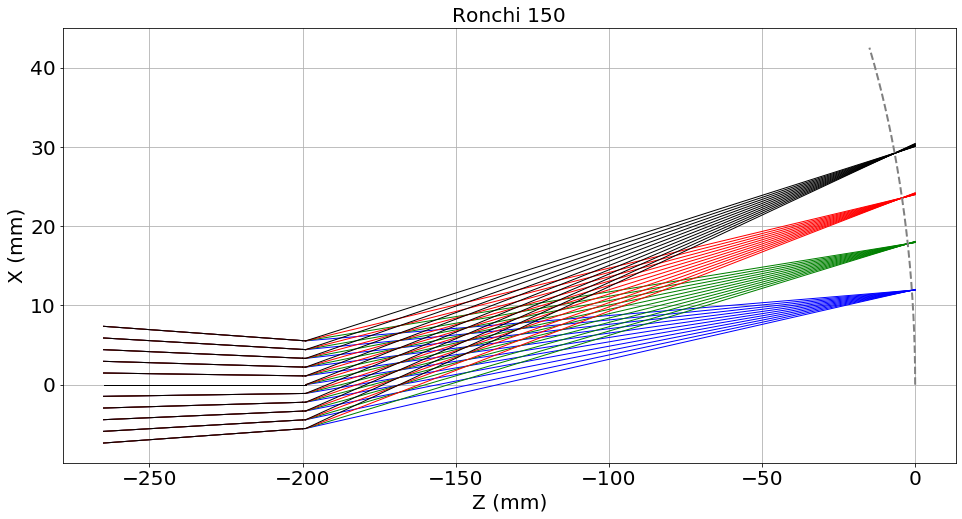

In [282]:
#fig=plt.figure(figsize=(16,8))
fig,ax = plt.subplots(figsize=(16,8))

for index, row in df_R150.iterrows():
    wl=row["wave"]
    col=ColorDict[wl]
    X0=row["X0"];Y0=row["Y0"];Z0=row["Z0"]-central_ray["Z3"]
    X1=row["X1"];Y1=row["Y1"];Z1=row["Z1"]-central_ray["Z3"]
    X2=row["X2"];Y2=row["Y2"];Z2=row["Z2"]-central_ray["Z3"]
    X3=row["X3"];Y3=row["Y3"];Z3=row["Z3"]-central_ray["Z3"]
    if Y0==0:
        ax.plot([Z0,Z1],[X0,X1],"-",color=col,lw=1)
        ax.plot([Z1,Z2],[X1,X2],"-",color=col,lw=1)
        ax.plot([Z2,Z3],[X2,X3],"-",color=col,lw=1)

if 0: # check the intersection       
    plt.plot(XX,YY0,"--",color="orange",lw=2)
    plt.plot(XX,YY1,"-.",color="y",lw=2)
    plt.plot(XX,YY2,".",color="y",lw=2)


# show by computing where is the focus
plt.plot(XXX,YYY,"--",color="grey",lw=2)



ax.grid()
#ax.set_xlim(-70,0)
#ax.set_ylim(-10,30)
ax.set_title("Ronchi 150")   
ax.set_xlabel("Z (mm)")
ax.set_ylabel("X (mm)")    

## Image for paper

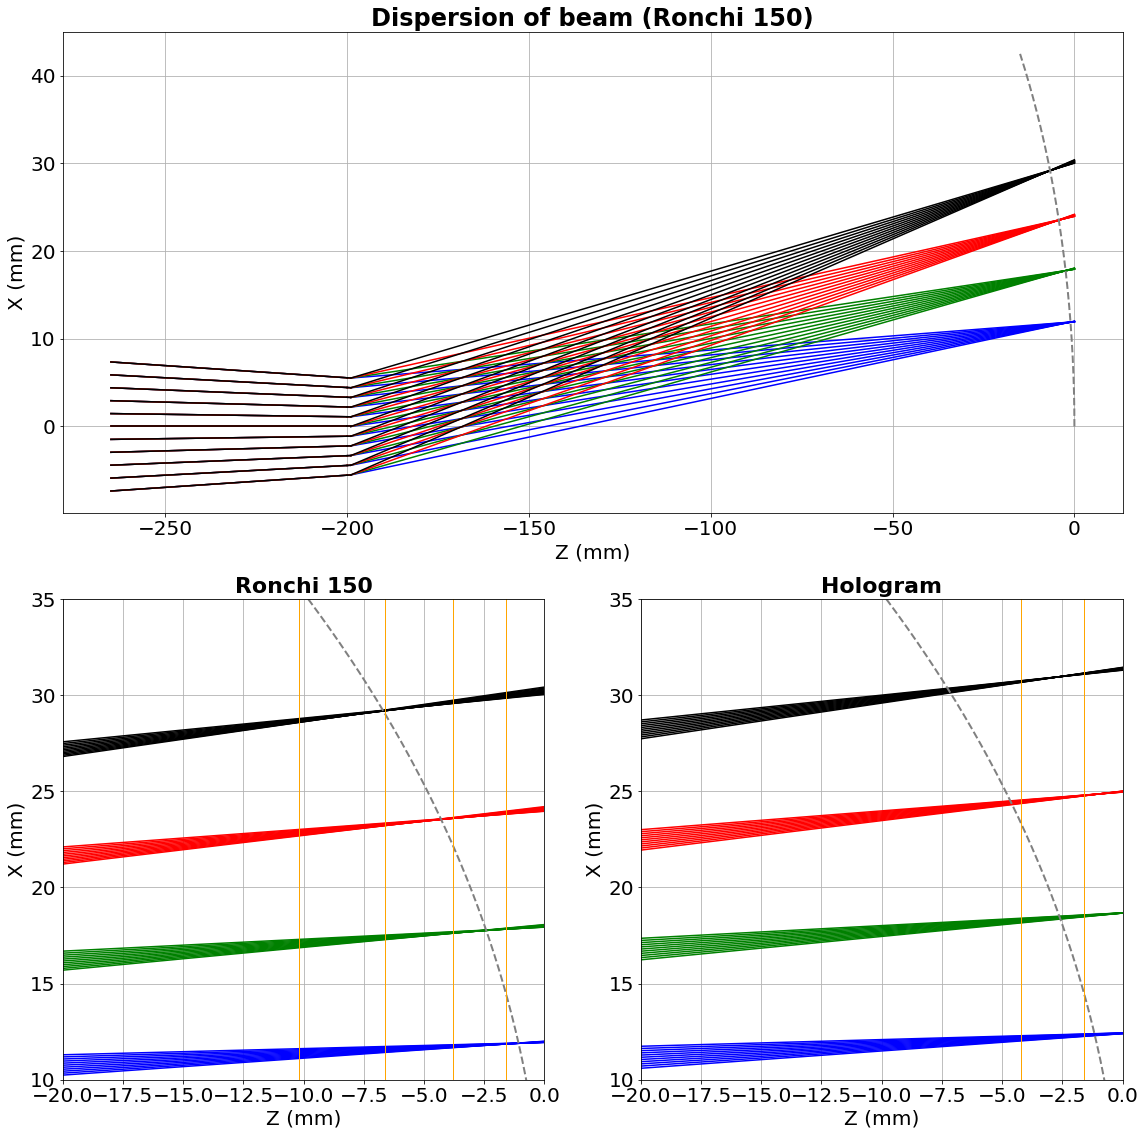

In [286]:
# gridspec inside gridspec
fig = plt.figure(figsize=(16,16))
gs0 = gridspec.GridSpec(2, 1, figure=fig)

################
# Top figure
################

ax1 = fig.add_subplot(gs0[0])

## get the focalisation 
a      = 1./150.   # the grating
idx_wl = 3    # choose one of the wavelength
thewl  = WLIndexDict[idx_wl] 

# main rays
central_ray=(df_R150.loc[(df_R150["U0"]==0) & (df_R150["X0"]==0) & (df_R150["Y0"]==0)]).iloc[idx_wl]
upper_ray=(df_R150.loc[(df_R150["X0"]==df_R150["X0"].max()) & (df_R150["Y0"]==0)]).iloc[idx_wl]
lower_ray=(df_R150.loc[(df_R150["X0"]==df_R150["X0"].min()) & (df_R150["Y0"]==0)]).iloc[idx_wl]
x0=0
y0=central_ray["X0"]
u0=central_ray["W0"]
v0=central_ray["U0"]

y1=upper_ray["X2"]
u1=upper_ray["W0"]
v1=upper_ray["U0"]

y2=lower_ray["X2"]
u2=lower_ray["W0"]
v2=lower_ray["U0"]
XXXR150,YYYR150=GetRayConvergenceIntersectionPoints(x0,y0,u0,v0,y1,u1,v1,y2,u2,v2,a,m=1,WLMIN=0.,WLMAX=1500.,NBPOINTS=500)
XXXR150=XXXR150+central_ray["Z2"]-central_ray["Z3"]

for index, row in df_R150.iterrows():
    wl=row["wave"]
    col=ColorDict[wl]
    X0=row["X0"];Y0=row["Y0"];Z0=row["Z0"]-row["Z3"]
    X1=row["X1"];Y1=row["Y1"];Z1=row["Z1"]-row["Z3"]
    X2=row["X2"];Y2=row["Y2"];Z2=row["Z2"]-row["Z3"]
    X3=row["X3"];Y3=row["Y3"];Z3=row["Z3"]-row["Z3"]
    if Y0==0:
        ax1.plot([Z0,Z1],[X0,X1],"-",color=col)
        ax1.plot([Z1,Z2],[X1,X2],"-",color=col)
        ax1.plot([Z2,Z3],[X2,X3],"-",color=col)
        
#ellipse = mpl.patches.Ellipse(xy=(X0C_R400, Y0C_R400), width=2*R0C_R400, height=2*R0C_R400,angle=1,color="grey",fill=False)        
#fig.gca().add_artist(ellipse)
ax1.plot(XXXR150,YYYR150,"--",color="grey",lw=2) # plot trajectory curve

ax1.grid()
#ax1.set_xlim(-70,0)
#ax1.set_ylim(-10,30)
ax1.set_xlabel("Z (mm)")
ax1.set_ylabel("X (mm)")
ax1.set_title("Dispersion of beam (Ronchi 150)",fontweight="bold",fontsize=24)
ax1.tick_params(axis='both', which='major', labelsize=20)
#ax1.tick_params(axis='both', which='minor', labelsize=8)

###################
# Bottom figures
#################

gs01 = gs0[1].subgridspec(1, 2)
ax2=fig.add_subplot(gs01[0,0])
ax3=fig.add_subplot(gs01[0,1])


#################################
# Bottom left figure with RON150
#################################


shifts_R150=[-1.6,-3.8,-6.6,-10.2]

## get the focalisation points
a      = 1./150.   # the grating
idx_wl = 3    # choose one of the wavelength
thewl  = WLIndexDict[idx_wl] 

# main rays
central_ray=(df_R150.loc[(df_R150["U0"]==0) & (df_R150["X0"]==0) & (df_R150["Y0"]==0)]).iloc[idx_wl]
upper_ray=(df_R150.loc[(df_R150["X0"]==df_R150["X0"].max()) & (df_R150["Y0"]==0)]).iloc[idx_wl]
lower_ray=(df_R150.loc[(df_R150["X0"]==df_R150["X0"].min()) & (df_R150["Y0"]==0)]).iloc[idx_wl]
x0=0
y0=central_ray["X0"]
u0=central_ray["W0"]
v0=central_ray["U0"]

y1=upper_ray["X2"]
u1=upper_ray["W0"]
v1=upper_ray["U0"]

y2=lower_ray["X2"]
u2=lower_ray["W0"]
v2=lower_ray["U0"]
XXXR150,YYYR150=GetRayConvergenceIntersectionPoints(x0,y0,u0,v0,y1,u1,v1,y2,u2,v2,a,m=1,WLMIN=0.,WLMAX=1500.,NBPOINTS=500)
XXXR150=XXXR150+central_ray["Z2"]-central_ray["Z3"]
    
    
for index, row in df_R150.iterrows():
    wl=row["wave"]
    col=ColorDict[wl]
    X0=row["X0"];Y0=row["Y0"];Z0=row["Z0"]-row["Z3"]
    X1=row["X1"];Y1=row["Y1"];Z1=row["Z1"]-row["Z3"]
    X2=row["X2"];Y2=row["Y2"];Z2=row["Z2"]-row["Z3"]
    X3=row["X3"];Y3=row["Y3"];Z3=row["Z3"]-row["Z3"]
    if Y0==0:
        ax2.plot([Z2,Z3],[X2,X3],"-",color=col)
            
    #ellipse = mpl.patches.Ellipse(xy=(X0C_R350, Y0C_R350), width=2*R0C_R350, height=2*R0C_R350,angle=1,color="grey",fill=False)        
    #fig.gca().add_artist(ellipse)
    #ax3.add_artist(ellipse)
    
ax2.plot(XXXR150,YYYR150,"--",color="grey",lw=2) # plot trajectory curve

# vertical lines marking defocus
for shift in shifts_R150:
    ax2.axvline(x=shift,color="orange",lw=1)
    
ax2.grid()
ax2.set_xlim(-20,0)
ax2.set_ylim(10,35)
ax2.set_xlabel("Z (mm)")
ax2.set_ylabel("X (mm)")
ax2.set_title("Ronchi 150",fontweight="bold",fontsize=22)
ax2.tick_params(axis='both', which='major', labelsize=20)
#ax1.tick_params(axis='both', which='minor', labelsize=8)


###########################
# Bottom right figure : HOE
#############################  
    
shifts_HOE=[1.0,0.2,-1.6,-4.2]
        
for index, row in df_hoe.iterrows():
    wl=row["wave"]
    col=ColorDict[wl]
    X0=row["X0"];Y0=row["Y0"];Z0=row["Z0"]-row["Z3"]
    X1=row["X1"];Y1=row["Y1"];Z1=row["Z1"]-row["Z3"]
    X2=row["X2"];Y2=row["Y2"];Z2=row["Z2"]-row["Z3"]
    X3=row["X3"];Y3=row["Y3"];Z3=row["Z3"]-row["Z3"]
    if Y0==0:
        ax3.plot([Z2,Z3],[X2,X3],"-",color=col)
            
            
    #ellipse = mpl.patches.Ellipse(xy=(X0C_R400, Y0C_R400), width=2*R0C_R400, height=2*R0C_R400,angle=1,color="grey",fill=False)        
    #ax4.add_artist(ellipse)

ax3.plot(XXXR150,YYYR150,"--",color="grey",lw=2) # plot trajectory curve

    
# vertical lines marking defocus
for shift in shifts_HOE:
    ax3.axvline(x=shift,color="orange",lw=1)
    
ax3.grid()
ax3.set_xlim(-20,0)
ax3.set_ylim(10,35)
ax3.set_xlabel("Z (mm)")
ax3.set_ylabel("X (mm)")
ax3.set_title("Hologram",fontweight="bold",fontsize=22)
ax3.tick_params(axis='both', which='major', labelsize=20)
    #ax1.tick_params(axis='both', which='minor', labelsize=8)

plt.tight_layout()
plt.savefig("BeamDispersion.pdf")

